In [103]:
import cv2
import argparse
import numpy as np
import matplotlib.pyplot as plt

#import matplotlib.image as mpimg
from scipy import signal
import argparse
import open3d as o3d
import plotly.graph_objects as go

In [104]:
def draw_geometries(geometries):
    graph_objects = []

    for geometry in geometries:
        geometry_type = geometry.get_geometry_type()
        
        if geometry_type == o3d.geometry.Geometry.Type.PointCloud:
            points = np.asarray(geometry.points)
            colors = None
            if geometry.has_colors():
                colors = np.asarray(geometry.colors)
            elif geometry.has_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.normals) * 0.5
            else:
                geometry.paint_uniform_color((0.0, 1.0, 0.0))
                colors = np.asarray(geometry.colors)

            scatter_3d = go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers', marker=dict(size=1, color=colors))
            graph_objects.append(scatter_3d)

        if geometry_type == o3d.geometry.Geometry.Type.TriangleMesh:
            triangles = np.asarray(geometry.triangles)
            vertices = np.asarray(geometry.vertices)
            colors = None
            if geometry.has_triangle_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.triangle_normals) * 0.5
                colors = tuple(map(tuple, colors))
            else:
                colors = (0.0, 1.0, 0.0)
            
            mesh_3d = go.Mesh3d(x=vertices[:,0], y=vertices[:,1], z=vertices[:,2], i=triangles[:,0], j=triangles[:,1], k=triangles[:,2], facecolor=colors, opacity=0.50)
            graph_objects.append(mesh_3d)
    
    fig = go.Figure(
        data=graph_objects,
        layout=dict(
            scene=dict(
                xaxis=dict(visible=False),
                yaxis=dict(visible=False),
                zaxis=dict(visible=False)
            )
        )
    )
    #fig.update_layout(autosize=False,width=200,height=200,)
    fig.show()

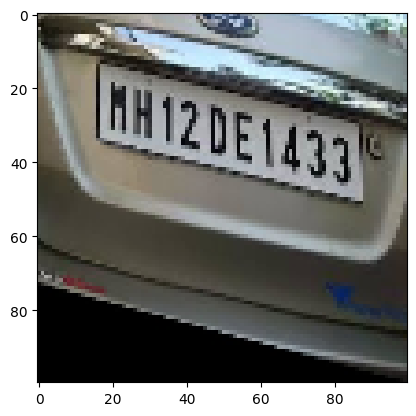

In [105]:
#画像表示
image = cv2.imread("imgs/number_plate1.jpg") # lena image size: 512x512
image = cv2.resize(image,(100,100))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [106]:
h, w, c  = image.shape

intensity_f_r = np.reshape(image[:,:,0],(h*w,1))
intensity_f_g = np.reshape(image[:,:,1],(h*w,1))
intensity_f_b = np.reshape(image[:,:,2],(h*w,1))

x = np.arange(0,w,1)
y = np.arange(h,0,-1)

mesh_x, mesh_y = np.meshgrid(x,y)
x_f = np.reshape(mesh_x,(h*h,1))
y_f = np.reshape(mesh_y,(h*h,1))
z_f = np.zeros((h*h,1))
my_img_position = np.concatenate((x_f,y_f,z_f),axis=1)
my_img_position = my_img_position/h

my_img_color = np.concatenate((intensity_f_r,intensity_f_g,intensity_f_b),axis=1)
my_img_color = ((my_img_color - my_img_color.min()) / (my_img_color.max() - my_img_color.min()))
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(my_img_position)
pcd.colors = o3d.utility.Vector3dVector(my_img_color)

#o3d.io.write_point_cloud("imgs/image_pcd.ply", pcd)
#pcd_load = o3d.io.read_point_cloud("imgs/image_pcd.ply")

In [107]:
draw_geometries([pcd])